<a href="https://colab.research.google.com/github/SantanuxD/Regression/blob/master/Myfirst_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

print("Imported")


Imported


In [4]:
dataset = pd.read_csv('/content/kc_house_data.csv')

dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
dataset = dataset.drop(['id' , 'date'], axis = 1)

In [8]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
dataset['price'].corr(dataset['bathrooms'])

0.525137505413962

In [11]:
dataset['price'].corr(dataset['sqft_living'])

0.7020350546118003

In [12]:
dataset['price'].corr(dataset['zipcode'])

-0.05320285429832562

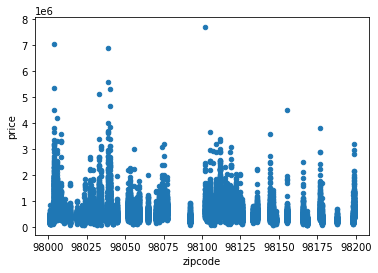

In [14]:
dataset.plot.scatter(x='zipcode', y='price')

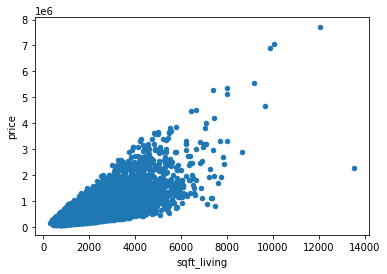

In [15]:
dataset.plot.scatter(x='sqft_living', y='price')

In [17]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [18]:
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [19]:
X[0]

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02,
        1.34000e+03,  5.65000e+03])

In [20]:
y[0]

221900.0

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [24]:
len(X)

21613

In [25]:
len(X_train)

14408

In [26]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
model = sm.OLS(y_train, X_train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              8136.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:56:05   Log-Likelihood:                     -1.9639e+05
No. Observations:               14408   AIC:                                  3.928e+05
Df Residuals:                   14391   BIC:                                  3.929e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.577e+04   2395.389    -14.935      0.000   -4.05e+04   -3.11e+04
x2          3.978e+04   3985.160      9.981      0.000     3.2e+04    4.76e+04
x3           108.7935      2.770     39.273      0.000     103.364     114.223
x4             0.1077      0.068      1.590      0.112      -0.025       0.241
x5          9359.8817   4345.255      2.154      0.031     842.622    1.79e+04
x6          5.521e+05   2.11e+04     26.223      0.000    5.11e+05    5.93e+05
x7          5.142e+04   2601.136     19.769      0.000    4.63e+04    5.65e+04
x8          2.643e+04   2858.739      9.247      0.000    2.08e+04     3.2e+04
x9          9.698e+04   2641.678     36.712      0.000    9.18e+04    1.02e+05
x10           65.6318      2.749     23.872      0.000      60.243      71.021
x11           43.1618      3.210     13.446      0.000      36.870      49.454
x12        -2628.4650     83.239    -31.577      0.000   -2791.624   -2465.306
x13           23.2664      4.461      5.215      0.000      14.522      32.011
x14         -519.1373     22.113    -23.477      0.000    -562.482    -475.793
x15         5.953e+05   1.32e+04     45.206      0.000     5.7e+05    6.21e+05
x16        -2.216e+05   1.62e+04    -13.719      0.000   -2.53e+05    -1.9e+05
x17           30.7995      4.152      7.418      0.000      22.662      38.937
x18           -0.4140      0.098     -4.216      0.000      -0.606      -0.222
==============================================================================
Omnibus:                    12345.239   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1275273.758
Skew:                           3.598   Prob(JB):                         0.00
Kurtosis:                      48.525   Cond. No.                     3.65e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
predictions = model.predict(X_test)

In [31]:
len(predictions)

7205

In [32]:
predictions[0]

526961.3587599478

In [33]:
y_test[0]

561000.0

In [34]:
predictions[6]

632864.4411391626

In [35]:
y_test[6]

585188.0

In [36]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test, predictions)

40679331713.22044